In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# MEA-Flow imports
from mea_flow.data import load_axion_spk, SpikeList, load_data
from mea_flow.analysis import MEAMetrics
from mea_flow.manifold import ManifoldAnalysis
from mea_flow.visualization import MEAPlotter
from mea_flow.utils import setup_logging

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
setup_logging()

<Logger mea_flow (INFO)>

In [4]:
# Dataset configuration
data_path = '/media/neuro/Data/MEA-data/'
conditions = ['control', 'chronic-stress', 'miR-186-5p-inhibition']
filenames = ['n1-DIV17-01.mat', 'n2-DIV17-01.mat', 'n3-DIV17-01.mat']  # Use .mat files

# Load datasets into condition-based dictionary
spike_data = {}

for condition, filename in zip(conditions, filenames):
    file_path = Path(data_path) / filename
    spike_data[condition] = load_data(
        file_path=file_path,
        data_format='mat',
        channels_key='Channels',
        times_key='Times',
        time_unit='s'  # Times are already in seconds in the .mat file
    )

print(f"\nSuccessfully loaded {len(spike_data)} conditions")


Successfully loaded 3 conditions


In [5]:
signal_matrix, time_vector = spike_data['control'].to_continuous_signal(tau=0.02, channels=None, dt=0.001)

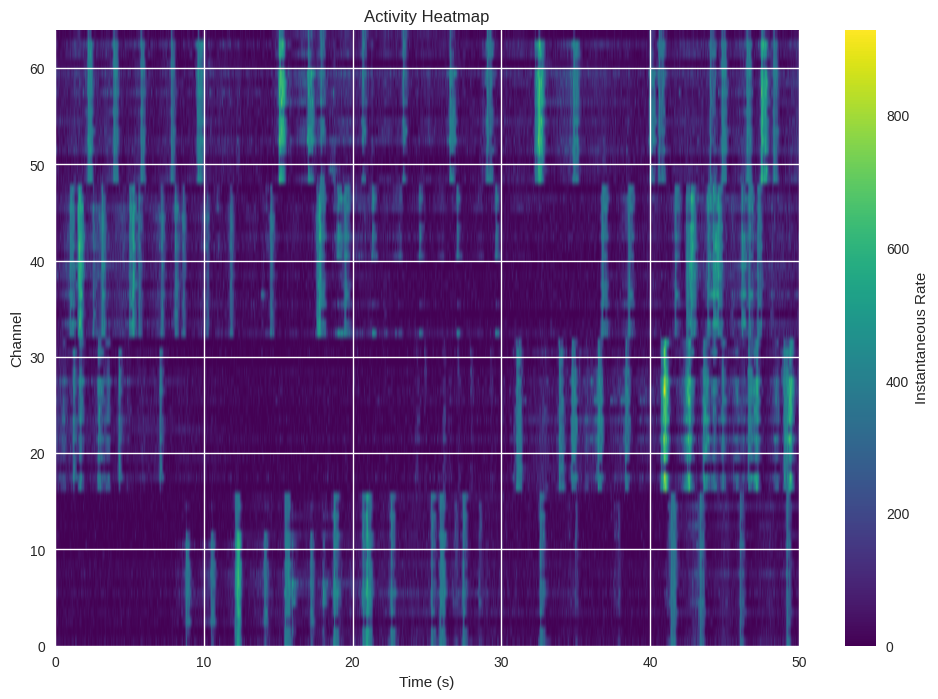

In [19]:
# Or create heatmap of all channels
fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(signal_matrix, aspect='auto', cmap='viridis', 
               extent=[0, spike_data['control'].recording_length, 0, len(spike_data['control'].channel_ids)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Channel')
ax.set_title('Activity Heatmap')
ax.set_xlim([0, 50])
plt.colorbar(im, label='Instantaneous Rate')